In [3924]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3925]:
df = pd.read_csv("stats.csv")

class_names = df["race"].unique()
print(class_names)

['dragonborn' 'dwarf' 'elf' 'gnome' 'half.elf' 'half.orc' 'halfling'
 'human' 'tiefling']


In [3926]:
df
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width',10)
pd.set_option('display.max_colwidth', 10)
 
display(df)

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragon...,79,279,30,14,15,12,7,13,16
1,dragon...,79,331,30,11,11,11,13,13,17
2,dragon...,71,230,30,14,16,11,13,10,18
3,dragon...,75,265,30,8,19,7,10,13,16
4,dragon...,72,229,30,8,17,14,14,10,9
...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,63,146,30,13,18,17,13,15,13
9996,tiefling,72,230,30,8,14,13,6,14,20
9997,tiefling,66,137,30,4,5,16,12,12,15
9998,tiefling,68,143,30,12,16,12,15,9,16


In [3927]:
ability_score_columns = ['strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']
df_6 = df.copy()
for column in ability_score_columns:
    df_6[column + '_modifier'] = (df[column] - 10) // 2


df_6

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,79,279,30,14,...,2,1,-2,1,3
1,dragon...,79,331,30,11,...,0,0,1,1,3
2,dragon...,71,230,30,14,...,3,0,1,0,4
3,dragon...,75,265,30,8,...,4,-2,0,1,3
4,dragon...,72,229,30,8,...,3,2,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,63,146,30,13,...,4,3,1,2,1
9996,tiefling,72,230,30,8,...,2,1,-2,2,5
9997,tiefling,66,137,30,4,...,-3,3,1,1,2
9998,tiefling,68,143,30,12,...,3,1,2,-1,3


In [3928]:
label_encoder_x= LabelEncoder()

df.loc[:, "race"]= label_encoder_x.fit_transform(df.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_23688\2426952998.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "race"]= label_encoder_x.fit_transform(df.loc[:, "race"])


In [3929]:
lista = df.columns.values.tolist()
lista.remove("race")
X = df.loc[:,lista]
Y = df.loc[:, "race"]

Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3930]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [3931]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3932]:
model_RandomForestClassifier = RandomForestClassifier(max_depth=10,n_estimators=50, random_state=42)
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [3933]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [3934]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [3935]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [3936]:
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[3 4 1 ... 4 2 5]

LogisticRegression
[5 8 1 ... 8 0 6]

RandomForestClassifier
[5 8 1 ... 7 0 6]

DecisionTreeClassifier
[5 7 1 ... 7 0 6]

KNeighborsClassifier
[5 4 1 ... 4 0 6]

GaussianNB
[0 8 1 ... 7 0 6]


In [3937]:
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0  26  73 100  39   0   0   0   0]
 [ 43 160  19   0   0   0   0   0   0]
 [  0   0   0  12  54  99  54   9   0]
 [  0   0   0  21 162  27   0   0   0]
 [  0   0   0   9  69  85  51   2   0]
 [  0   0  21  47  78  61   9   0   0]
 [  0   0   0   0  45 168  19   0   0]
 [  0   0   3  26  74  86  40  12   0]
 [  0   0   0  13  46  85  50   3   0]]

LogisticRegression
[[182   0   0   0   1  39   0  13   3]
 [  0 178   0   0   0  38   0   3   3]
 [  6   2 125   0  22   9   0  23  41]
 [  0   0   0 207   0   0   3   0   0]
 [  8   2  44   0  45   7   0  48  62]
 [ 43  16   6   0   7 119   0  17   8]
 [  0   0   0   3   0   0 229   0   0]
 [ 12  18  41   0  29  24   0  75  42]
 [  4   3  30   0  39   5   0  30  86]]

RandomForestClassifier
[[204   0   0   0   0  29   0   4   1]
 [  0 222   0   0   0   0   0   0   0]
 [  3   0 123   0  22  11   0  22  47]
 [  0   0   0 210   0   0   0   0   0]
 [  6   0  35   0  44  14   0  38  79]
 [ 50   0  11   0   6 127   0  14   8]


In [3938]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0  26  73 100  39   0   0   0   0]
 [ 43 160  19   0   0   0   0   0   0]
 [  0   0   0  12  54  99  54   9   0]
 [  0   0   0  21 162  27   0   0   0]
 [  0   0   0   9  69  85  51   2   0]
 [  0   0  21  47  78  61   9   0   0]
 [  0   0   0   0  45 168  19   0   0]
 [  0   0   3  26  74  86  40  12   0]
 [  0   0   0  13  46  85  50   3   0]]

LogisticRegression
[[182   0   0   0   1  39   0  13   3]
 [  0 178   0   0   0  38   0   3   3]
 [  6   2 125   0  22   9   0  23  41]
 [  0   0   0 207   0   0   3   0   0]
 [  8   2  44   0  45   7   0  48  62]
 [ 43  16   6   0   7 119   0  17   8]
 [  0   0   0   3   0   0 229   0   0]
 [ 12  18  41   0  29  24   0  75  42]
 [  4   3  30   0  39   5   0  30  86]]

RandomForestClassifier
[[204   0   0   0   0  29   0   4   1]
 [  0 222   0   0   0   0   0   0   0]
 [  3   0 123   0  22  11   0  22  47]
 [  0   0   0 210   0   0   0   0   0]
 [  6   0  35   0  44  14   0  38  79]
 [ 50   0  11   0   6 127   0  14   8]


In [3939]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.171

LogisticRegression
0.623

RandomForestClassifier
0.6565

DecisionTreeClassifier
0.6505

KNeighborsClassifier
0.6205

GaussianNB
0.618


In [3940]:
df_7 = df_6.copy()

for i in  range(df_6.shape[1]-1):
    df_7[df_7.columns[i+1]]=df_6[df_6.columns[i+1]]**3

df_7

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,493039,21717639,27000,2744,...,8,1,-8,1,27
1,dragon...,493039,36264691,27000,1331,...,0,0,1,1,27
2,dragon...,357911,12167000,27000,2744,...,27,0,1,0,64
3,dragon...,421875,18609625,27000,512,...,64,-8,0,1,27
4,dragon...,373248,12008989,27000,512,...,27,8,8,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,250047,3112136,27000,2197,...,64,27,1,8,1
9996,tiefling,373248,12167000,27000,512,...,8,1,-8,8,125
9997,tiefling,287496,2571353,27000,64,...,-27,27,1,1,8
9998,tiefling,314432,2924207,27000,1728,...,27,1,8,-1,27


In [3941]:
label_encoder_x= LabelEncoder()

df_7.loc[:, "race"]= label_encoder_x.fit_transform(df_7.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_23688\2521552240.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_7.loc[:, "race"]= label_encoder_x.fit_transform(df_7.loc[:, "race"])


In [3942]:
lista = df_7.columns.values.tolist()
lista.remove("race")
X = df_7.loc[:,lista]
Y = df_7.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3943]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x_train, y_train)

LinearRegression()

In [3944]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3945]:
model_RandomForestClassifier = RandomForestClassifier(max_depth=10,n_estimators=20 , random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [3946]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [3947]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [3948]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [3949]:
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[2 4 2 ... 4 2 4]

LogisticRegression
[0 7 0 ... 7 0 3]

RandomForestClassifier
[5 8 1 ... 8 0 6]

DecisionTreeClassifier
[5 7 1 ... 7 0 6]

KNeighborsClassifier
[5 4 1 ... 7 0 6]

GaussianNB
[0 8 1 ... 7 0 6]


In [3950]:
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0   0   0   0   0   0   0   0   0   0]
 [  2  24  45  62  72  33   0   0   0   0]
 [  0   0  15 191  16   0   0   0   0   0]
 [  0   0   0   0  11  45  95  61  16   0]
 [  0   0   0   0  10 198   2   0   0   0]
 [  0   0   0   0  11  58  83  59   5   0]
 [  0   0  11  19  42  60  66  18   0   0]
 [  0   0   0   0   1 224   7   0   0   0]
 [  0   0   0   6  25  60  86  50  14   0]
 [  0   0   0   0  14  33  77  65   8   0]]

LogisticRegression
[[207   1   0   0   0   0   0  29   1]
 [179   0   0   0   0  18   0  25   0]
 [ 17   0 153   0  14   0   9  20  15]
 [  0   0   0 210   0   0   0   0   0]
 [ 18   0 111   0  32   0   0  40  15]
 [133  11   0   0   6   1   0  56   9]
 [  0   0   0 232   0   0   0   0   0]
 [ 34   0 101   0  22   0   0  53  31]
 [  8   0  99   0  31   0   0  37  22]]

RandomForestClassifier
[[196   0   0   0   1  39   0   1   1]
 [  0 222   0   0   0   0   0   0   0]
 [  6   0 124   0  23  10   0  22  43]
 [  0   0   0 201   0   0   9   0   0]

In [3951]:
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.0935

LogisticRegression
0.339

RandomForestClassifier
0.6345

DecisionTreeClassifier
0.65

KNeighborsClassifier
0.841

GaussianNB
0.6015


In [3952]:
df_8 = df_6.copy()

for i in  range(df_6.shape[1]-1):
    df_8[df_8.columns[i+1]]=df_6[df_6.columns[i+1]]**2

df_8

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,6241,77841,900,196,...,4,1,4,1,9
1,dragon...,6241,109561,900,121,...,0,0,1,1,9
2,dragon...,5041,52900,900,196,...,9,0,1,0,16
3,dragon...,5625,70225,900,64,...,16,4,0,1,9
4,dragon...,5184,52441,900,64,...,9,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,3969,21316,900,169,...,16,9,1,4,1
9996,tiefling,5184,52900,900,64,...,4,1,4,4,25
9997,tiefling,4356,18769,900,16,...,9,9,1,1,4
9998,tiefling,4624,20449,900,144,...,9,1,4,1,9


In [3953]:
label_encoder_x= LabelEncoder()

df_8.loc[:, "race"]= label_encoder_x.fit_transform(df_8.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_23688\1826260203.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_8.loc[:, "race"]= label_encoder_x.fit_transform(df_8.loc[:, "race"])


In [3954]:
lista = df_8.columns.values.tolist()
lista.remove("race")
X = df_8.loc[:,lista]
Y = df_8.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3955]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

c:\Users\marto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3956]:

model_RandomForestClassifier = RandomForestClassifier(max_depth=10, random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [3957]:

model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [3958]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [3959]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [3960]:
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[-3 -3 -3 ... -3 -3 -3]

LogisticRegression
[0 7 1 ... 7 0 3]

RandomForestClassifier
[0 8 1 ... 7 0 6]

DecisionTreeClassifier
[5 7 1 ... 7 0 6]

KNeighborsClassifier
[5 8 1 ... 7 0 6]

GaussianNB
[0 2 1 ... 7 0 6]


In [3961]:
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[  0   0   0   0   0   0   0   0   0   0]
 [238   0   0   0   0   0   0   0   0   0]
 [222   0   0   0   0   0   0   0   0   0]
 [228   0   0   0   0   0   0   0   0   0]
 [210   0   0   0   0   0   0   0   0   0]
 [216   0   0   0   0   0   0   0   0   0]
 [216   0   0   0   0   0   0   0   0   0]
 [232   0   0   0   0   0   0   0   0   0]
 [241   0   0   0   0   0   0   0   0   0]
 [197   0   0   0   0   0   0   0   0   0]]

LogisticRegression
[[203   0   0   0   0   6   0  26   3]
 [  0 176   0   0   0  37   0   9   0]
 [  9   1 164   0  17   6   0  23   8]
 [  0   0   0 210   0   0   0   0   0]
 [ 11   0 100   0  50   5   0  41   9]
 [ 73   9   3   0   8  86   0  37   0]
 [  0   0   0 185   0   0  47   0   0]
 [ 19   2  93   0  33  17   0  65  12]
 [  4   0  84   0  54   3   0  36  16]]

RandomForestClassifier
[[194   0   0   0   0  37   0   4   3]
 [  0 222   0   0   0   0   0   0   0]
 [  3   0 135   0  19   9   0  23  39]
 [  0   0   0 207   0   0   3   0   0]

In [3962]:
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.0

LogisticRegression
0.5085

RandomForestClassifier
0.6385

DecisionTreeClassifier
0.646

KNeighborsClassifier
0.797

GaussianNB
0.588


In [3963]:
df_6

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,79,279,30,14,...,2,1,-2,1,3
1,dragon...,79,331,30,11,...,0,0,1,1,3
2,dragon...,71,230,30,14,...,3,0,1,0,4
3,dragon...,75,265,30,8,...,4,-2,0,1,3
4,dragon...,72,229,30,8,...,3,2,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,63,146,30,13,...,4,3,1,2,1
9996,tiefling,72,230,30,8,...,2,1,-2,2,5
9997,tiefling,66,137,30,4,...,-3,3,1,1,2
9998,tiefling,68,143,30,12,...,3,1,2,-1,3


In [3964]:
df_6[df_6.columns[9]]

0       16
1       17
2       18
3       16
4        9
        ..
9995    13
9996    20
9997    15
9998    16
9999    13
Name: charisma, Length: 10000, dtype: int64

In [3965]:
df_9 = df_6.copy()

for i in  range(df_6.shape[1]-6):
   df_9[df_9.columns[i+1]]=df_6[df_6.columns[i+1]]**4
for i in  range(df_6.shape[1]-10):
    df_9[df_9.columns[i+10]]=df_6[df_6.columns[i+10]]**7

df_9

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,38950081,605922...,810000,38416,...,128,1,-128,1,2187
1,dragon...,38950081,120036...,810000,14641,...,0,0,1,1,2187
2,dragon...,25411681,279841...,810000,38416,...,2187,0,1,0,16384
3,dragon...,31640625,493155...,810000,4096,...,16384,-128,0,1,2187
4,dragon...,26873856,275005...,810000,4096,...,2187,128,128,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,15752961,454371856,810000,28561,...,16384,2187,1,128,1
9996,tiefling,26873856,279841...,810000,4096,...,128,1,-128,128,78125
9997,tiefling,18974736,352275361,810000,256,...,-2187,2187,1,1,128
9998,tiefling,21381376,418161601,810000,20736,...,2187,1,128,-1,2187


In [3966]:
df_10 = df_6.copy()



df_10["height"] = df_10["height"]**11
df_10["weight"] = df_10["weight"]**4
df_10["speed"] = df_10["speed"]-27.5
df_10["speed"] = df_10["speed"]*2

asd=4

df_10["strength"] = df_10["strength"]**asd
df_10["dexterity"] = df_10["dexterity"]**asd
df_10["constitution"] = df_10["constitution"]**asd
df_10["intelligence"] = df_10["intelligence"]**asd
df_10["wisdom"] = df_10["wisdom"]**asd
df_10["charisma"] = df_10["charisma"]**asd

dsa=7

df_10["strength_modifier"] = df_10["strength_modifier"]**dsa
df_10["dexterity_modifier"] = df_10["dexterity_modifier"]**dsa
df_10["constitution_modifier"] = df_10["constitution_modifier"]**dsa
df_10["intelligence_modifier"] = df_10["intelligence_modifier"]**dsa
df_10["wisdom_modifier"] = df_10["wisdom_modifier"]**dsa
df_10["charisma_modifier"] = df_10["charisma_modifier"]**dsa

df_10

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,dragon...,-832269...,605922...,5.0,38416,...,128,1,-128,1,2187
1,dragon...,-832269...,120036...,5.0,14641,...,0,0,1,1,2187
2,dragon...,-868538...,279841...,5.0,38416,...,2187,0,1,0,16384
3,dragon...,-192375...,493155...,5.0,4096,...,16384,-128,0,1,2187
4,dragon...,-713991...,275005...,5.0,4096,...,2187,128,128,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,671037...,454371856,5.0,28561,...,16384,2187,1,128,1
9996,tiefling,-713991...,279841...,5.0,4096,...,128,1,-128,128,78125
9997,tiefling,-717023...,352275361,5.0,256,...,-2187,2187,1,1,128
9998,tiefling,-382720...,418161601,5.0,20736,...,2187,1,128,-1,2187


In [3967]:
df_10.describe()

,height,weight,speed,strength,dexterity,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
count,1.0000...,1.0000...,10000....,10000....,10000....,...,10000....,10000....,10000....,10000....,10000....
mean,-1.7968...,1.0988...,1.64900,35869....,35692....,...,1348.2...,1115.1...,1054.4...,682.26...,1355.8...
std,4.7882...,1.6283...,4.72049,28723....,28777....,...,5750.4...,5073.0...,4460.2...,2645.0...,5667.2...
min,-9.1777...,2.3134...,-5.00000,81.000000,81.000000,...,-16384....,-16384....,-16384....,-16384....,-16384....
25%,-6.7376...,2.0736...,-5.00000,14641....,14641....,...,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-6.1378...,5.6244...,5.00000,28561....,28561....,...,1.000000,1.000000,1.000000,1.000000,1.00000
75%,4.1943...,1.2491...,5.00000,50625....,50625....,...,128.00...,128.00...,128.00...,128.00...,128.00000
max,8.9802...,1.8141...,5.00000,160000...,160000...,...,78125....,78125....,78125....,16384....,78125....


In [3968]:
label_encoder_x= LabelEncoder()

df_9.loc[:, "race"]= label_encoder_x.fit_transform(df_9.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_23688\3237825935.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_9.loc[:, "race"]= label_encoder_x.fit_transform(df_9.loc[:, "race"])


In [3969]:
lista = df_9.columns.values.tolist()
lista.remove("race")
X = df_9.loc[:,lista]
Y = df_9.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3970]:

model_RandomForestClassifier = RandomForestClassifier(max_depth=10, random_state=42,criterion="gini")
model_RandomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [3971]:
model_DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
model_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [3972]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [3973]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(x_train,y_train)

GaussianNB()

In [3974]:
from sklearn.metrics import classification_report, confusion_matrix
kimenet_LinearRegression = model_LinearRegression.predict(x_test)
kimenet_LogisticRegression = model_LogisticRegression.predict(x_test)
kimenet_LinearRegression = kimenet_LinearRegression.round(0)
kimenet_LinearRegression = kimenet_LinearRegression.astype("int")
kimenet_RandomForestClassifier = model_RandomForestClassifier.predict(x_test)
kimenet_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(x_test)
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_GaussianNB = model_GaussianNB.predict(x_test)

kimenet = [kimenet_LinearRegression,kimenet_LogisticRegression,
           kimenet_RandomForestClassifier,kimenet_DecisionTreeClassifier,
           kimenet_KNeighborsClassifier,kimenet_GaussianNB]

names = ["LinearRegression","LogisticRegression",
           "RandomForestClassifier","DecisionTreeClassifier",
           "KNeighborsClassifier","GaussianNB"]

#print(len(names))
for i in range(len(kimenet)):
    print()
    print(names[i])
    print(kimenet[i])


LinearRegression
[-307  -62   47 ...  -92 -297  156]

LogisticRegression
[0 0 0 ... 0 0 3]

RandomForestClassifier
[0 8 1 ... 8 0 6]

DecisionTreeClassifier
[5 7 1 ... 7 0 6]

KNeighborsClassifier
[5 4 1 ... 7 0 6]

GaussianNB
[0 8 1 ... 7 0 6]


In [3975]:
from sklearn.metrics import confusion_matrix
cm_LinearRegression = confusion_matrix(y_test, kimenet_LinearRegression)
cm_LogisticRegression = confusion_matrix(y_test, kimenet_LogisticRegression)
cm_RandomForestClassifier = confusion_matrix(y_test, kimenet_RandomForestClassifier)
cm_DecisionTreeClassifier = confusion_matrix(y_test, kimenet_DecisionTreeClassifier)
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_GaussianNB = confusion_matrix(y_test, kimenet_GaussianNB)

cm = [cm_LinearRegression,cm_LogisticRegression,
           cm_RandomForestClassifier,cm_DecisionTreeClassifier,
           cm_KNeighborsClassifier,cm_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(cm[i])


LinearRegression
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

LogisticRegression
[[238   0   0   0   0   0   0   0   0]
 [222   0   0   0   0   0   0   0   0]
 [228   0   0   0   0   0   0   0   0]
 [  0   0   0 210   0   0   0   0   0]
 [216   0   0   0   0   0   0   0   0]
 [216   0   0   0   0   0   0   0   0]
 [  0   0   0 232   0   0   0   0   0]
 [241   0   0   0   0   0   0   0   0]
 [197   0   0   0   0   0   0   0   0]]

RandomForestClassifier
[[199   0   0   0   2  33   0   2   2]
 [  0 222   0   0   0   0   0   0   0]
 [  3   0 137   0  23  10   0  19  36]
 [  0   0   0 204   0   0   6   0   0]
 [  5   0  43   0  50   9   0  38  71]
 [ 56   0  19   0   8 111   0  13   9]
 [  0   0   0  10   0   0 222   0   0]
 [ 16   0  45   0  36  25   0  77  42]
 [  1   0  45   0  43   8   0  24  76]]

DecisionTreeClassifier
[[205   0   0   0   0   8   0  25   0]
 [  0 222   0   0   0   0   0   0   0]
 [  7   0 10

In [3976]:
from sklearn.metrics import accuracy_score
acc_LinearRegression = accuracy_score(y_test, kimenet_LinearRegression)
acc_LogisticRegression = accuracy_score(y_test, kimenet_LogisticRegression)
acc_RandomForestClassifier = accuracy_score(y_test,kimenet_RandomForestClassifier)
acc_DecisionTreeClassifier = accuracy_score(y_test, kimenet_DecisionTreeClassifier)
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_GaussianNB = accuracy_score(y_test,kimenet_GaussianNB)

acc = [acc_LinearRegression,acc_LogisticRegression,
           acc_RandomForestClassifier,acc_DecisionTreeClassifier,
           acc_KNeighborsClassifier,acc_GaussianNB]

for i in range(len(cm)):
    print()
    print(names[i])
    print(acc[i])


LinearRegression
0.0025

LogisticRegression
0.224

RandomForestClassifier
0.649

DecisionTreeClassifier
0.6505

KNeighborsClassifier
0.8445

GaussianNB
0.5735


In [3977]:
label_encoder_x= LabelEncoder()

df_7.loc[:, "race"]= label_encoder_x.fit_transform(df_7.loc[:, "race"])

In [3978]:
lista = df_7.columns.values.tolist()
lista.remove("race")
X = df_7.loc[:,lista]
Y = df_7.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3979]:
df_7

,race,height,weight,speed,strength,...,dexterity_modifier,constitution_modifier,intelligence_modifier,wisdom_modifier,charisma_modifier
0,0,493039,21717639,27000,2744,...,8,1,-8,1,27
1,0,493039,36264691,27000,1331,...,0,0,1,1,27
2,0,357911,12167000,27000,2744,...,27,0,1,0,64
3,0,421875,18609625,27000,512,...,64,-8,0,1,27
4,0,373248,12008989,27000,512,...,27,8,8,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
9995,8,250047,3112136,27000,2197,...,64,27,1,8,1
9996,8,373248,12167000,27000,512,...,8,1,-8,8,125
9997,8,287496,2571353,27000,64,...,-27,27,1,1,8
9998,8,314432,2924207,27000,1728,...,27,1,8,-1,27


In [3980]:

model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=9,weights="distance",algorithm="kd_tree",p=2,leaf_size=100,metric="euclidean")
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=100, metric='euclidean',
                     n_neighbors=9, weights='distance')

In [3981]:
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_KNeighborsClassifier

array([5, 8, 1, ..., 7, 0, 6])

In [3982]:
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_KNeighborsClassifier

array([[224,   0,   3,   0,   0,   6,   0,   5,   0],
       [  0, 222,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 217,   0,   4,   0,   0,   6,   1],
       [  0,   0,   0, 210,   0,   0,   0,   0,   0],
       [  1,   0,   2,   0, 102,   1,   0,   2, 108],
       [  6,   0,   8,   0,   2, 184,   0,  12,   4],
       [  0,   0,   0,   0,   0,   0, 232,   0,   0],
       [  5,   0,  14,   0,   7,   5,   0, 206,   4],
       [  1,   0,   1,   0,  72,   0,   0,   3, 120]], dtype=int64)

In [3983]:
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_KNeighborsClassifier

0.8585

In [3984]:
label_encoder_x= LabelEncoder()

df_9.loc[:, "race"]= label_encoder_x.fit_transform(df_9.loc[:, "race"])

In [3985]:
lista = df_9.columns.values.tolist()
lista.remove("race")
X = df_9.loc[:,lista]
Y = df_9.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [3986]:

model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=7,weights="distance",algorithm="kd_tree",p=2,leaf_size=30,metric="euclidean")
model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=7,
                     weights='distance')

In [3987]:
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_KNeighborsClassifier

array([5, 8, 1, ..., 7, 0, 6])

In [3988]:
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_KNeighborsClassifier

array([[226,   0,   3,   0,   0,   5,   0,   4,   0],
       [  0, 222,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 217,   0,   4,   0,   0,   6,   1],
       [  0,   0,   0, 210,   0,   0,   0,   0,   0],
       [  1,   0,   3,   0, 107,   1,   0,   2, 102],
       [  5,   0,   5,   0,   2, 192,   0,   9,   3],
       [  0,   0,   0,   0,   0,   0, 232,   0,   0],
       [  4,   0,  15,   0,   6,   7,   0, 205,   4],
       [  1,   0,   1,   0,  74,   0,   0,   3, 118]], dtype=int64)

In [3989]:
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_KNeighborsClassifier

0.8645

In [3990]:
from sklearn.metrics import precision_recall_fscore_support


In [3991]:
precision_recall_fscore_support(y_test, kimenet_KNeighborsClassifier, average="weighted")



(0.8667381555459132, 0.8645, 0.8648902914963834, None)

In [3992]:
label_encoder_x= LabelEncoder()

df_10.loc[:, "race"]= label_encoder_x.fit_transform(df_10.loc[:, "race"])

C:\Users\marto\AppData\Local\Temp\ipykernel_23688\3989264482.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_10.loc[:, "race"]= label_encoder_x.fit_transform(df_10.loc[:, "race"])


In [4041]:
lista = df_10.columns.values.tolist()
lista.remove("race")
X = df_10.loc[:,lista]
Y = df_10.loc[:, "race"]
Y=Y.astype("int")
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

In [4042]:
model_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=7,weights="distance",algorithm="ball_tree",p=2,leaf_size=30,metric="euclidean")



model_KNeighborsClassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=7,
                     weights='distance')

In [4043]:
kimenet_KNeighborsClassifier = model_KNeighborsClassifier.predict(x_test)
kimenet_KNeighborsClassifier

array([5, 8, 1, ..., 7, 0, 6])

In [4044]:
cm_KNeighborsClassifier = confusion_matrix(y_test,kimenet_KNeighborsClassifier)
cm_KNeighborsClassifier

array([[227,   0,   0,   0,   0,   4,   0,   7,   0],
       [  0, 222,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 217,   0,   4,   0,   0,   6,   1],
       [  0,   0,   0, 210,   0,   0,   0,   0,   0],
       [  1,   0,   3,   0, 107,   1,   0,   2, 102],
       [  2,   0,   5,   0,   1, 194,   0,  11,   3],
       [  0,   0,   0,   0,   0,   0, 232,   0,   0],
       [  4,   0,  15,   0,   6,   7,   0, 205,   4],
       [  1,   0,   1,   0,  74,   0,   0,   3, 118]], dtype=int64)

In [4045]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



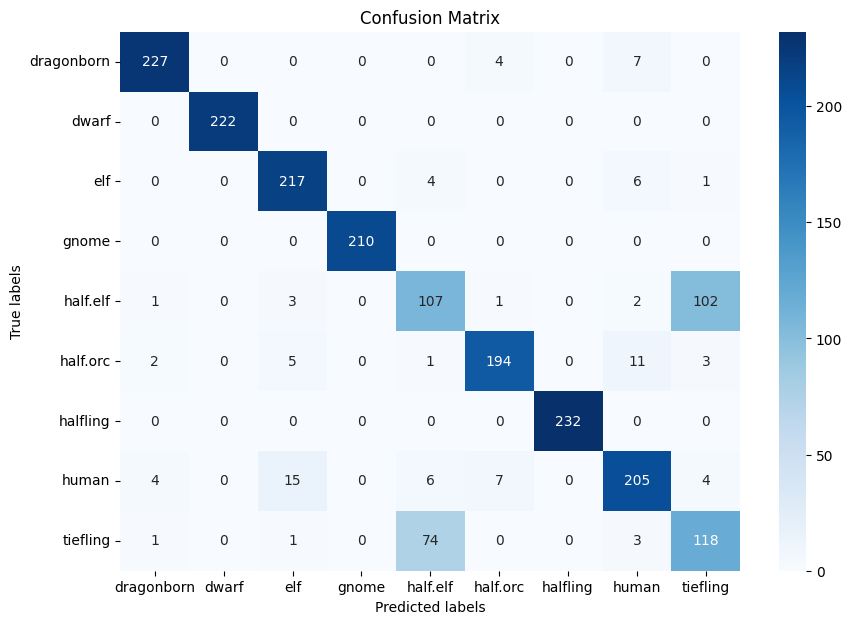

In [4046]:


plt.figure(figsize=(10, 7))  # Adjust size as needed
sns.heatmap(cm_KNeighborsClassifier, annot=True, fmt='g', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [4047]:
acc_KNeighborsClassifier = accuracy_score(y_test, kimenet_KNeighborsClassifier)
acc_KNeighborsClassifier

0.866

In [4048]:
precision_recall_fscore_support(y_test, kimenet_KNeighborsClassifier, average="weighted")


(0.8680367864305326, 0.866, 0.866365044390145, None)

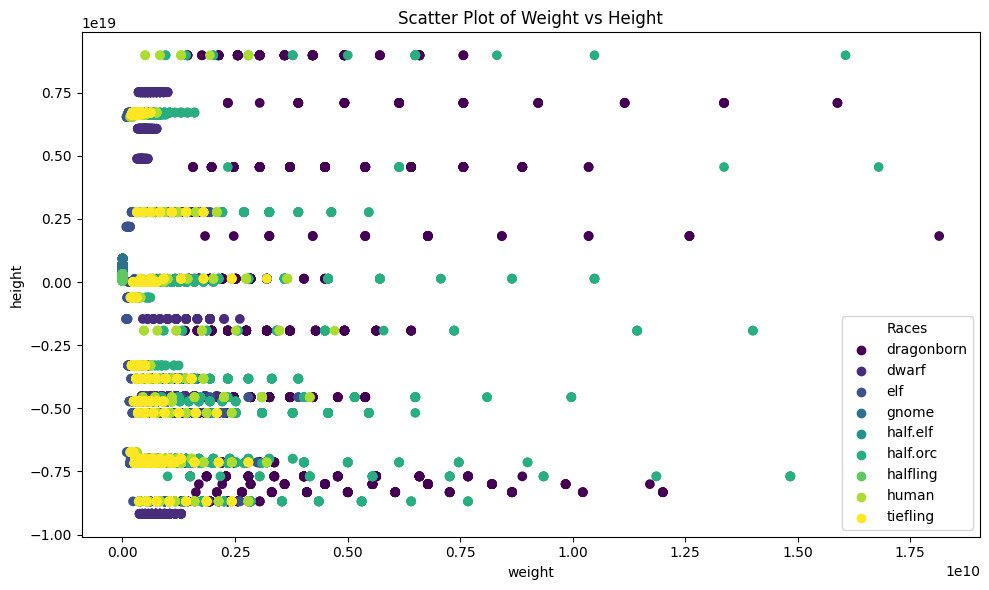

In [4049]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_10 is your DataFrame
# df_10 = pd.DataFrame(...) 

# Convert 'race' to a categorical variable for color mapping
race_categories = df_10['race'].astype('category')
df_10['race_category'] = race_categories.cat.codes

# Create a colormap
colormap = plt.cm.get_cmap('viridis', len(race_categories.cat.categories))

plt.figure(figsize=(10, 6))

# Use the 'race_category' for color
scatter = plt.scatter(df_10['weight'], df_10['height'], 
                      c=df_10['race_category'], cmap=colormap)

# Create a custom legend
for i, race in enumerate(class_names):
    plt.scatter([], [], color=colormap(i), label=race)

plt.legend(title="Races")

plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('weight')
plt.ylabel('height')

plt.tight_layout()
plt.show()




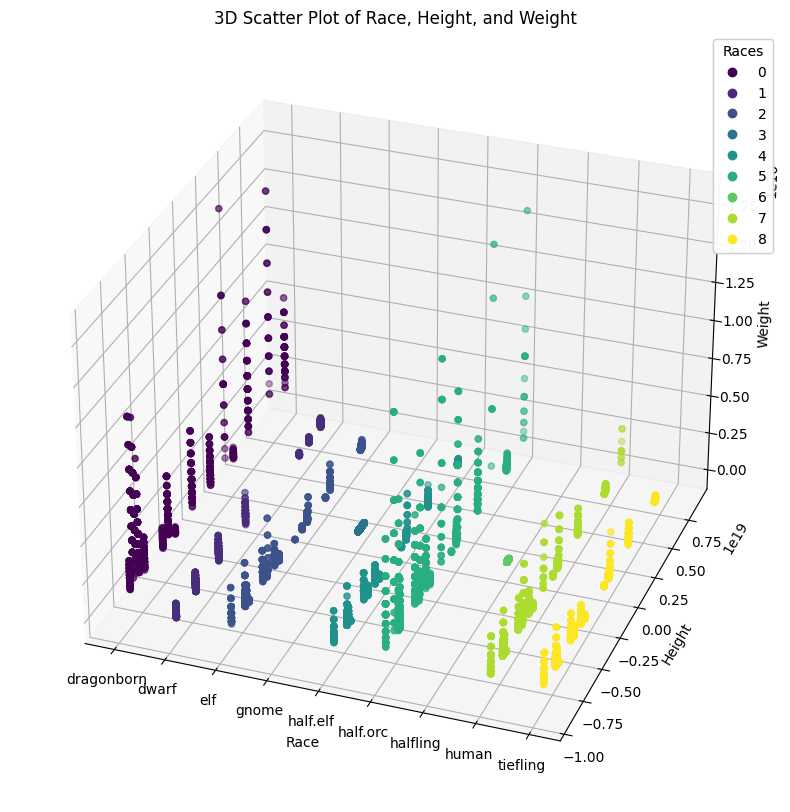

In [4050]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming df_10 is your DataFrame
# df_10 = pd.DataFrame(...) 

# Convert 'race' to a categorical variable for color mapping
df_10['race_category'] = df_10['race'].astype('category').cat.codes

# Create a colormap
colormap = plt.cm.get_cmap('viridis', len(df_10['race'].unique()))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Use the 'race_category' for color
scatter = ax.scatter(df_10['race_category'], df_10['height'], df_10['weight'], 
                     c=df_10['race_category'], cmap=colormap, marker='o')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Races")
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('Race')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

# Optionally, replace numeric labels with actual race names
ax.set_xticks(range(len(df_10['race'].unique())))
ax.set_xticklabels(class_names)

# Set the elevation and azimuthal angles for rotation
ax.view_init(elev=30, azim=-70)  # You can adjust these angles as needed

# Show the plot
plt.title('3D Scatter Plot of Race, Height, and Weight')
plt.show()



In [4051]:
import joblib
"""joblib.dump(model_KNeighborsClassifier, "./model_KNeighborsClassifier.joblib")"""

'joblib.dump(model_KNeighborsClassifier, "./model_KNeighborsClassifier.joblib")'

In [4052]:
model_KNeighborsClassifier = joblib.load("./model_KNeighborsClassifier.joblib")
